## 1. Loading data

In [5]:
# MNIST dataset downloaded from Kaggle : https://www.kaggle.com/c/digit-recognizer/data

# importing necessary libraries 
import numpy as np
import pandas as pd
import pandas.testing as tm
import matplotlib.pyplot as plt
import seaborn as sns

# load data from csv into pandas dataframe
mnist_df = pd.read_csv('train.csv')

# display first few rows
mnist_df.head() 

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
# store the labels into a variable y
y = mnist_df['label']

# store the pixel data in X
X = mnist_df.drop("label", axis = 1)

In [7]:
# print shape of the dataset 
print(X.shape)
print(y.shape)

(42000, 784)
(42000,)


class label: 0
class label: 4
class label: 5
class label: 9


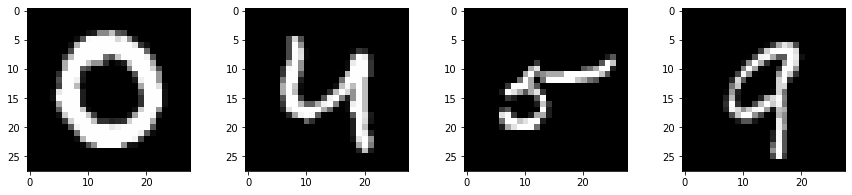

In [7]:
# display few random records from datset
plt.figure(figsize = (15,3))
plt.subplot(1,4,1)
idx = 1
grid_data = X.iloc[idx].values.reshape(28,28)  # reshape from 1d to 2d pixel array
plt.imshow(grid_data, interpolation = "none", cmap = 'gray')
print("class label:", y[idx])

plt.subplot(1,4,2)
idx = 420
grid_data = X.iloc[idx].values.reshape(28,28)  # reshape from 1d to 2d pixel array
plt.imshow(grid_data, interpolation = "none", cmap = 'gray')
print("class label:", y[idx])

plt.subplot(1,4,3)
idx = 1001
grid_data = X.iloc[idx].values.reshape(28,28)  # reshape from 1d to 2d pixel array
plt.imshow(grid_data, interpolation = "none", cmap = 'gray')
print("class label:", y[idx])

plt.subplot(1,4,4)
idx = 41999
grid_data = X.iloc[idx].values.reshape(28,28)  # reshape from 1d to 2d pixel array
plt.imshow(grid_data, interpolation = "none", cmap = 'gray')
print("class label:", y[idx])

plt.show()

## 2. Data visualization with t-SNE technique using sklearn 


### 2.1 With default parameters (perplexity = 30, n_iter = 1000)

In [41]:
# selecting top 5k datapoints as TSNE takes a lot of time & recources for all 42k points
X_sample = X[0:5000]
y_sample = y[0:5000]

from sklearn.manifold import TSNE
model = TSNE(n_components = 2, random_state = 24)
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000
tsne_data = model.fit_transform(X_sample)

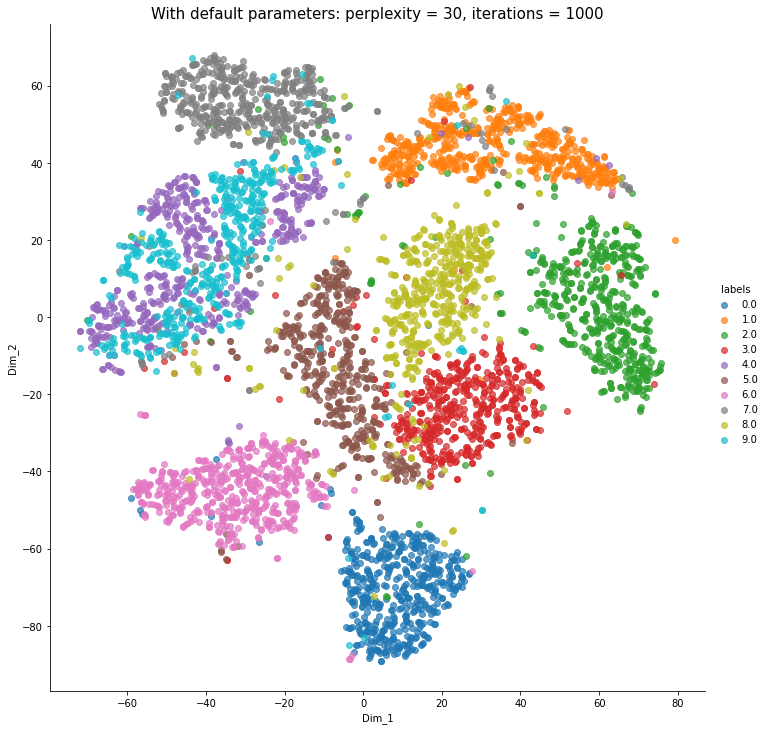

In [42]:
# creating a new data frame which help us in ploting the result data
labels = y_sample.values.reshape(-1,1)
tsne_dataset = np.hstack((tsne_data, labels))
tsne_df = pd.DataFrame(data = tsne_dataset, columns = ("Dim_1", "Dim_2", "labels"))

sns.lmplot(x = 'Dim_1', y = 'Dim_2', data = tsne_df, 
           hue = 'labels', legend = True, legend_out = True, height = 10,
           fit_reg = False, scatter_kws = {'alpha': 0.7})
plt.title("With default parameters: perplexity = 30, iterations = 1000", fontsize = 15)
plt.show()

> As it can be seen, there is a good amount of overlap among digits 9 and 4. 

> Note that t-SNE is like an unsupervised technique and doesn't need class-labels during computation. We include the class labels for visualization purpose or furthur implementing ML algo on this new transformed dataset.

In [ ]:
'''
# visualization with seaborn FaceGrid
sns.FacetGrid(tsne_df, hue="labels", size = 10).map(plt.scatter, "Dim_1", "Dim_2").add_legend()
plt.title('With perplexity = 2')
plt.show()
'''

### 2.2 Parameters: perplexity = 30, n_iter = 5000

In [43]:
model = TSNE(n_components = 2, n_iter = 5000, random_state = 24)
# default perplexity = 30
# default learning rate = 200
tsne_data = model.fit_transform(X_sample)

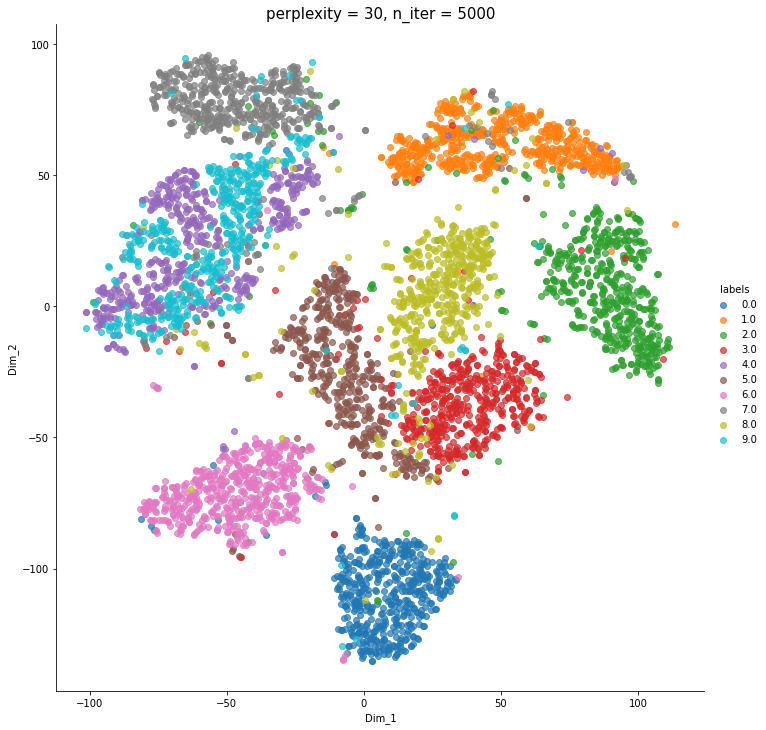

In [44]:
# creating a new data frame which help us in plotting the result data
labels = y_sample.values.reshape(-1,1)
tsne_dataset = np.hstack((tsne_data, labels))
tsne_df = pd.DataFrame(data = tsne_dataset, columns = ("Dim_1", "Dim_2", "labels"))

sns.lmplot(x = 'Dim_1', y = 'Dim_2', data = tsne_df, 
           hue = 'labels', legend = True, legend_out = True, height = 10,
           fit_reg = False, scatter_kws = {'alpha': 0.7})
plt.title("perplexity = 30, n_iter = 5000", fontsize = 15)
plt.show()

> t-SNE does an impressive job finding clusters and subclusters in the data, but is prone to getting stuck in local minima. For example, in the above image we can see two clusters of fours (violet) that fail to come together because a cluster of nines (blue) get stuck between them.

> A number of tricks can help us to avoid this bad local minima. Previously, we used just 5k datapoints, now let's use all 42k datapoints with 5000 iterations and see the result. 

### 2.3 Taking all 42k datapoints (Parameters: perplexity = 30, n_iter = 5000)

In [45]:
# using all 42k datapoints 

model = TSNE(n_components = 2, n_iter = 5000, random_state = 24)
# default perplexity = 30
# default learning rate = 200
tsne_data = model.fit_transform(X)

In [47]:
# creating a new data frame which help us in ploting the result data
labels = y.values.reshape(-1,1)
tsne_dataset = np.hstack((tsne_data, labels))
tsne_df = pd.DataFrame(data = tsne_dataset, columns = ("Dim_1", "Dim_2", "labels"))

In [54]:
tsne_df.head()

,Dim_1,Dim_2,labels
0,-109.510452,9.110404,1.0
1,108.007111,88.770203,0.0
2,-163.194504,-55.078140,1.0
3,94.277153,-110.917679,4.0
4,102.847328,117.279472,0.0


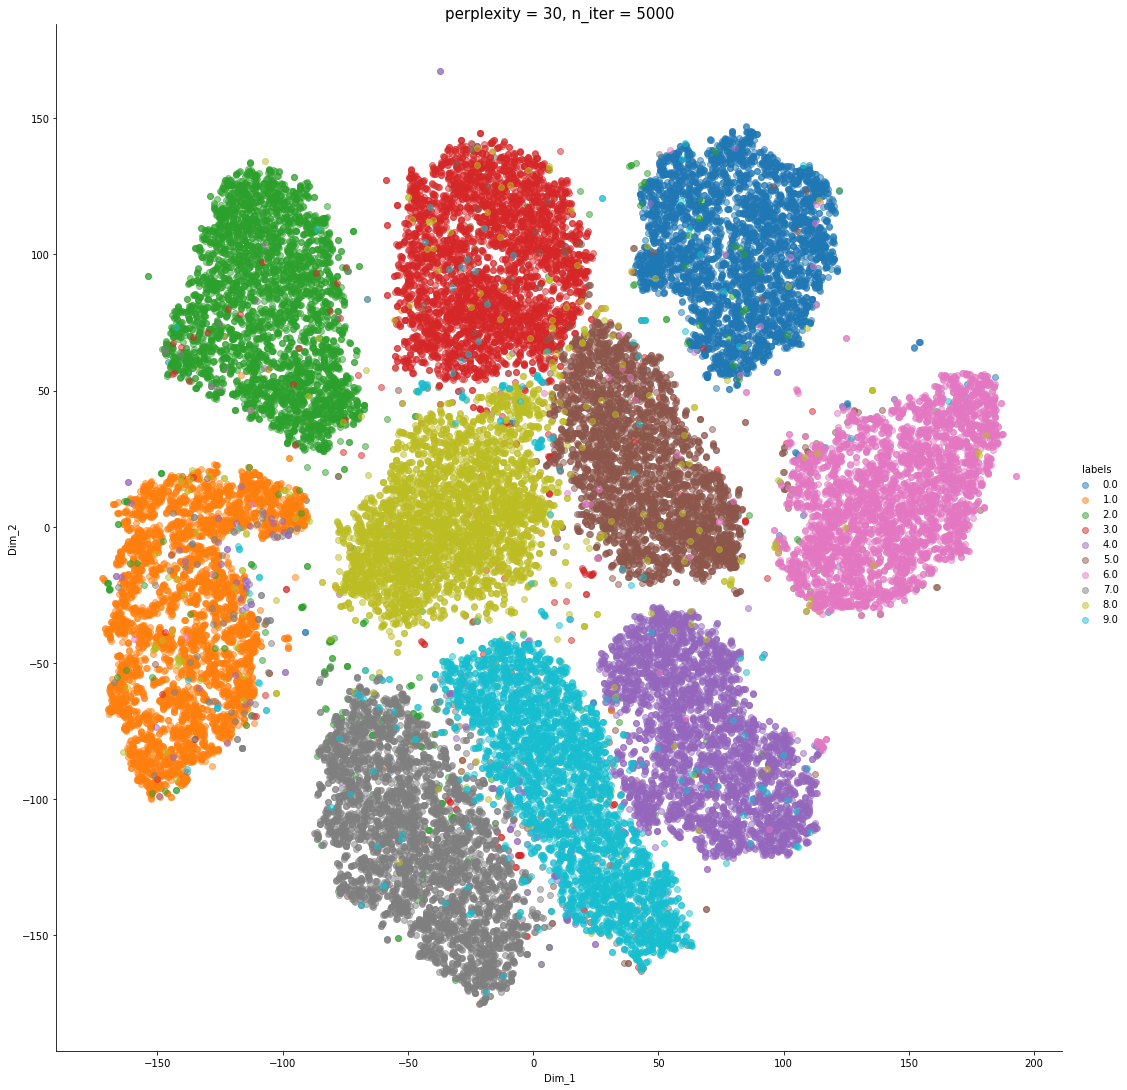

In [52]:
sns.lmplot(x = 'Dim_1', y = 'Dim_2', data = tsne_df, 
           hue = 'labels', legend = True, legend_out = True, height = 15,
           fit_reg = False, scatter_kws = {'alpha': 0.5})
plt.title("perplexity = 30, n_iter = 5000", fontsize = 15)
plt.show()